In [1]:
import numpy as np
from continuous_utils import Distribution, generate_agents, sim, Agent, Tolerance
from generateOpinions import *
import matplotlib.pyplot as plt

In [2]:

opinions = bimodal_opinions(
    num_agents=200,
    mean1=-0.5,
    mean2=0.5,
    std_dev1=0.1,
    std_dev2=0.1,
    lower_bound=-10,
    upper_bound=10,
    proportion_first_mode=0.5 )

# opinions = normal_opinions(
#     num_agents=1000,
#     mean=0,
#     std_dev=0.25,
#     lower_bound=-1,
#     upper_bound=1
# )

# opinions = trimodal_opinions(mean1=-0.5, mean2=0, mean3=0.5, std_dev=0.1, num_agents=1000, lower_bound=-1, upper_bound=1)


# steps = [(-0.6, 250), (0, 500), (0.6, 250)]  # Mean opinion and size for each step
# num_agents = 1000
# lower_bound = -1
# upper_bound = 1

# opinions = step_opinions(steps, num_agents, lower_bound, upper_bound)

# start = 0  # Starting point of the random walk in the middle of the opinion space
# num_agents = 1000
# step_size = 0.1  # Determines how much each step in the random walk can change

# opinions = random_walk_opinions(start, num_agents, step_size)

agents = generate_agents(opinions)

200


In [3]:
opinions = [agent.opinions[0] for agent in agents.values()]
len(opinions)

200

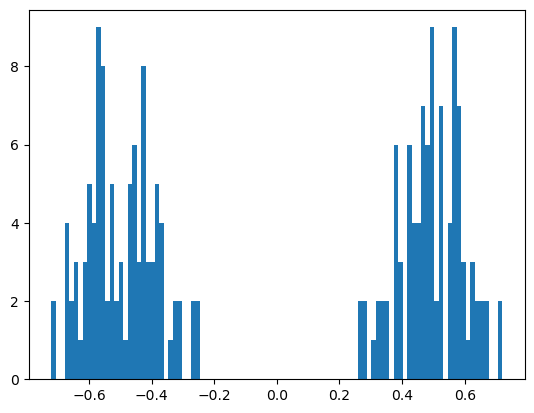

In [4]:
import matplotlib.pyplot as plt
plt.hist(opinions, bins=100)
plt.show()

In [5]:
agents = sim(agents, 1000)

iteration: 0
iteration: 100
iteration: 200
iteration: 300
iteration: 400
iteration: 500
iteration: 600
iteration: 700
iteration: 800
iteration: 900


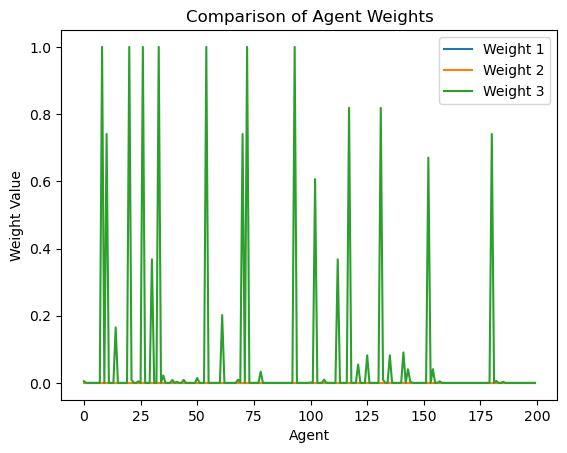

In [9]:
# Extract weights for each agent
weights_per_agent = [agent.strategy_weights for agent in agents.values()]

# Transpose the list so that each weight index corresponds to one agent
weights_per_dimension = list(map(list, zip(*weights_per_agent)))

# Plot each dimension of weights for all agents
for i, weights in enumerate(weights_per_dimension):
    plt.plot(range(len(agents)), weights, label=f'Weight {i+1}')

plt.xlabel('Agent')
plt.ylabel('Weight Value')
plt.title('Comparison of Agent Weights')
plt.legend()
plt.show()

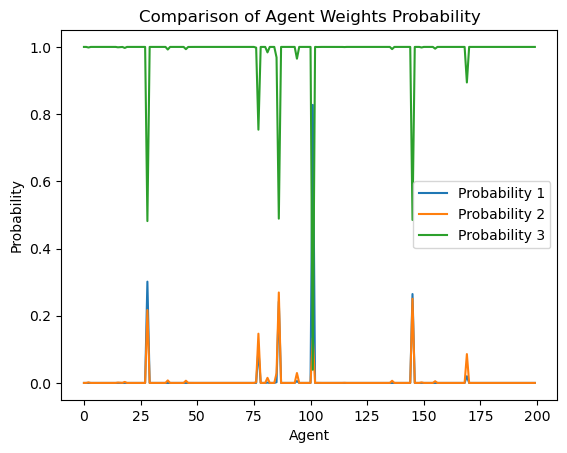

In [11]:
probabilities_per_agent = []
for agent in agents.values():
    total_weight = sum(agent.strategy_weights)
    probabilities = [weight / total_weight for weight in agent.strategy_weights]
    probabilities_per_agent.append(probabilities)

# Transpose the list so that each probability index corresponds to one agent
probabilities_per_dimension = list(map(list, zip(*probabilities_per_agent)))

# Plot each dimension of probabilities for all agents
for i, probabilities in enumerate(probabilities_per_dimension):
    plt.plot(range(len(agents)), probabilities, label=f'Probability {i+1}')

plt.xlabel('Agent')
plt.ylabel('Probability')
plt.title('Comparison of Agent Weights Probability')
plt.legend()
plt.show()